<a href="https://colab.research.google.com/github/RoselinSnehaJ/Aerofit_Descriptive-Statistics-Probability/blob/main/Aerofit%20-%20Descriptive%20Statistics%20%26%20Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [ ]:
!gdown https://drive.google.com/file/d/1nb5UNJ9D0rfO97MuA11rNgO85-KvKvhP/view?usp=drive_link -O aerofit.csv

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1nb5UNJ9D0rfO97MuA11rNgO85-KvKvhP
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1nb5UNJ9D0rfO97MuA11rNgO85-KvKvhP/view?usp=drive_link
To: /content/aerofit.csv
8.06kB [00:00, 68.3MB/s]


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/aerofit.csv')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


It displays information about the data structure and column types of the DataFrame called data. It's useful for quickly understanding the structure of your dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


It displays the dimensions of the DataFrame, showing the number of rows and columns. It's a quick way to get an overview of the size of your dataset.

In [ ]:
data.shape

(180, 9)

To check for missing values and find the number of missing values in each column of a DataFrame, I used the isnull() function followed by the sum() function.

In [ ]:
null_values = data.isnull().sum()
null_values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Displaying a boxplot to visualize the distribution of the 'Income' variable across different genders

<Axes: xlabel='Gender', ylabel='Income'>

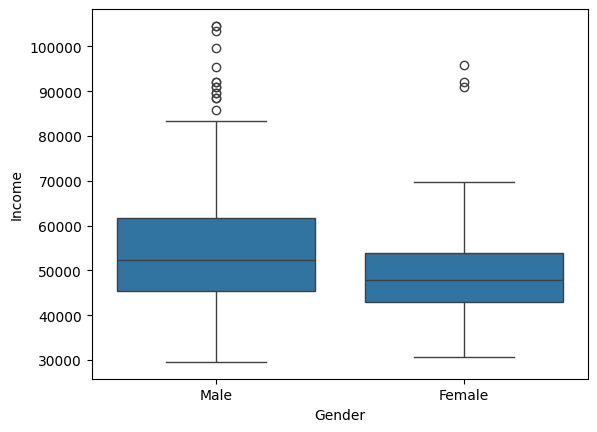

In [ ]:
sns.boxplot(data=data, x='Gender', y='Income')

Created box plot to find the outliers for every continuous variable in the dataset

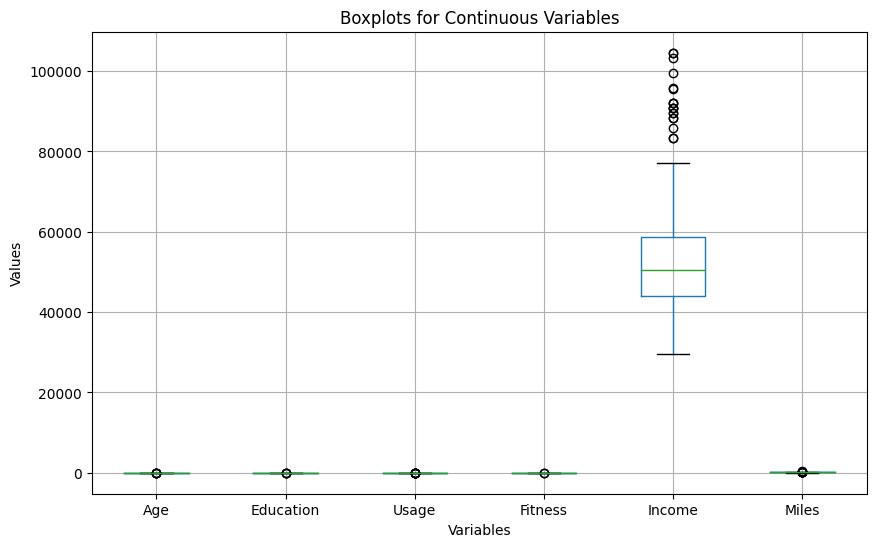

In [ ]:
# Create boxplots
data.boxplot(column=['Age','Education', 'Usage', 'Fitness', 'Income', 'Miles'], figsize=(10, 6))
plt.title('Boxplots for Continuous Variables')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

In [ ]:
# Identify outliers and clip the data
variables = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
for var in variables:
    q1 = data[var].quantile(0.05)
    q3 = data[var].quantile(0.95)
    data[var] = np.clip(data[var], q1, q3)

# Display the clipped dataset
print("Clipped Dataset:")
print(data)


Clipped Dataset:
    Product    Age  Gender  Education MaritalStatus  Usage  Fitness    Income  \
0     KP281  20.00    Male         14        Single   3.00        4  34053.15   
1     KP281  20.00    Male         15        Single   2.00        3  34053.15   
2     KP281  20.00  Female         14     Partnered   4.00        3  34053.15   
3     KP281  20.00    Male         14        Single   3.00        3  34053.15   
4     KP281  20.00    Male         14     Partnered   4.00        2  35247.00   
..      ...    ...     ...        ...           ...    ...      ...       ...   
175   KP781  40.00    Male         18        Single   5.05        5  83416.00   
176   KP781  42.00    Male         18        Single   5.00        4  89641.00   
177   KP781  43.05    Male         16        Single   5.00        5  90886.00   
178   KP781  43.05    Male         18     Partnered   4.00        5  90948.25   
179   KP781  43.05    Male         18     Partnered   4.00        5  90948.25   

     Miles

Displaying count plot to find the relationship between
categorical variables and output variables.


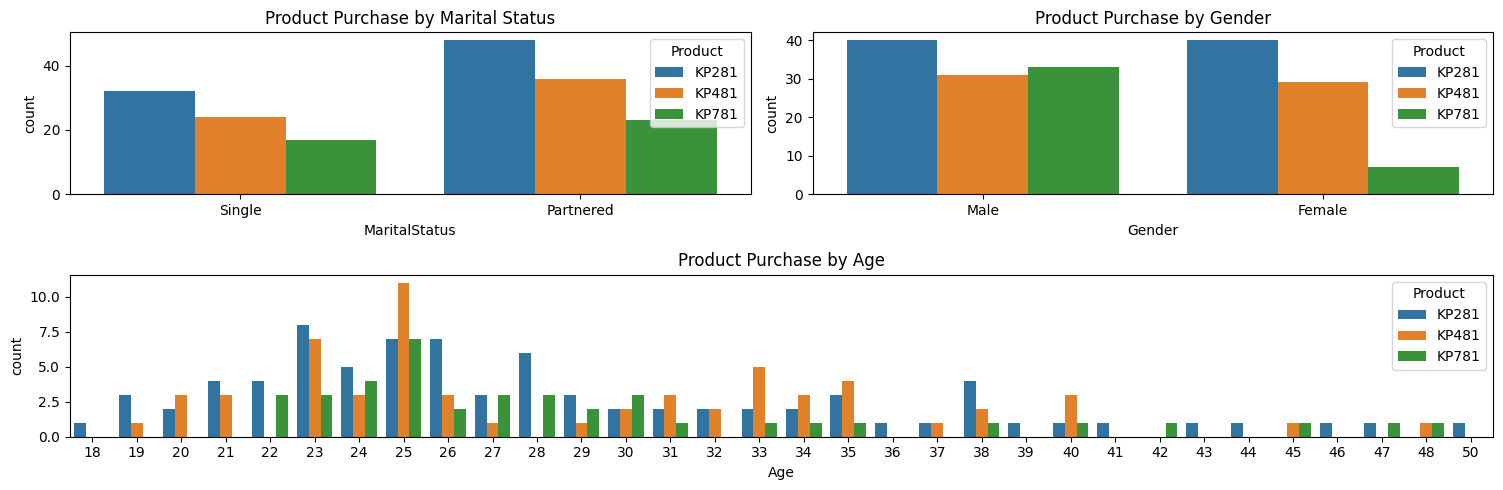

In [ ]:
# Create count plots for categorical variables
plt.figure(figsize=(15, 5))

plt.subplot(2,2,1)
sns.countplot(data=data, x='MaritalStatus', hue='Product')
plt.title('Product Purchase by Marital Status')

plt.subplot(2,2,2)
sns.countplot(data=data, x='Gender', hue='Product')
plt.title('Product Purchase by Gender')

plt.subplot(2,1,2)
sns.countplot(data=data, x='Age', hue='Product')
plt.title('Product Purchase by Age')

plt.tight_layout()
plt.show()


Displaying scatter plots to find the relationship between
continuous variables and output variables.

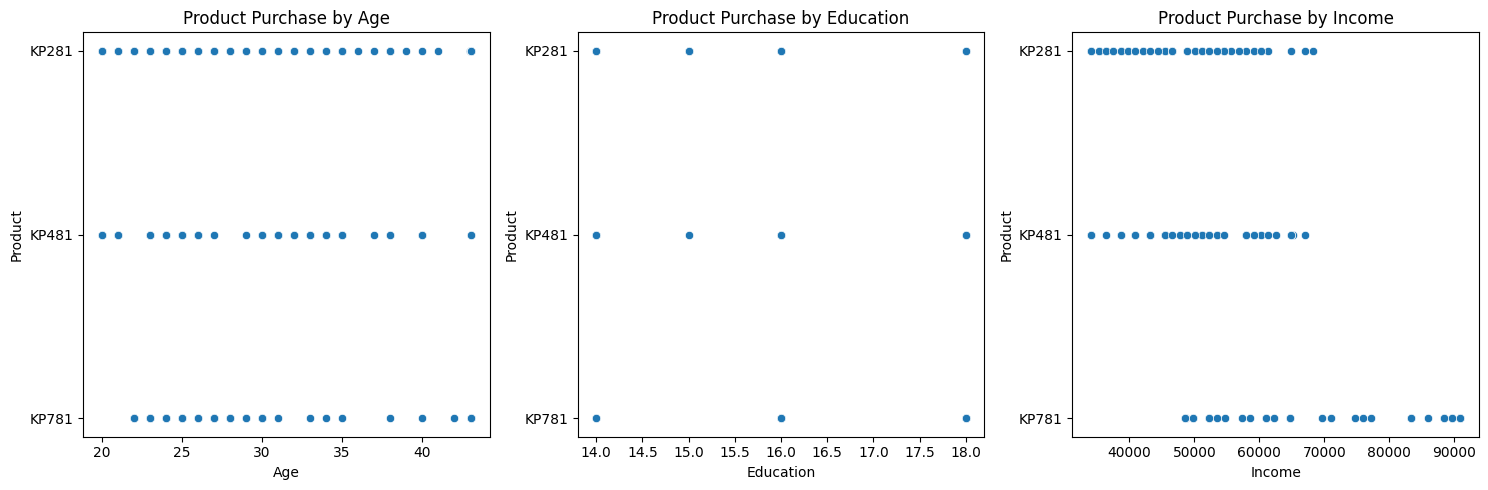

In [ ]:
# Create scatter plots for continuous variables against the output variable
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='Age', y='Product')
plt.title('Product Purchase by Age')

plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='Education', y='Product')
plt.title('Product Purchase by Education')

plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='Income', y='Product')
plt.title('Product Purchase by Income')

plt.tight_layout()
plt.show()

Utilised the pandas crosstab to find the marginal probability
of each product

In [ ]:
# Create a contingency table using crosstab
contingency_table = pd.crosstab(index=data['Product'], columns='count')

# Calculate the marginal probability
marginal_probability = contingency_table / contingency_table.sum()

print("Marginal Probability of Each Product:")
print(marginal_probability)


Marginal Probability of Each Product:
col_0       count
Product          
KP281    0.444444
KP481    0.333333
KP781    0.222222


In [ ]:
# Create a contingency table using crosstab for each feature against the product
feature_product_crosstab = pd.crosstab(index=[data['Gender'], data['Education'], data['MaritalStatus']], columns=data['Product'])

# Normalize by dividing each count by the total count in each column
probability_based_on_feature = feature_product_crosstab.div(feature_product_crosstab.sum(axis=1), axis=0)

print("Probability of Buying Each Product Based on Each Feature:")
print(probability_based_on_feature)

Probability of Buying Each Product Based on Each Feature:
Product                            KP281     KP481     KP781
Gender Education MaritalStatus                              
Female 14        Partnered      0.700000  0.300000  0.000000
                 Single         0.363636  0.636364  0.000000
       15        Partnered      1.000000  0.000000  0.000000
       16        Partnered      0.523810  0.428571  0.047619
                 Single         0.571429  0.357143  0.071429
       18        Partnered      0.000000  0.000000  1.000000
                 Single         0.200000  0.400000  0.400000
Male   14        Partnered      0.461538  0.461538  0.076923
                 Single         0.578947  0.368421  0.052632
       15        Single         0.666667  0.333333  0.000000
       16        Partnered      0.400000  0.428571  0.171429
                 Single         0.400000  0.133333  0.466667
       18        Partnered      0.076923  0.000000  0.923077
                 Single    

In [ ]:
# Create a contingency table using crosstab for gender and product
gender_product_crosstab = pd.crosstab(index=data['Gender'], columns=data['Product'])

# Calculate the conditional probability
conditional_probability = gender_product_crosstab.div(gender_product_crosstab.sum(axis=1), axis=0)

print("Conditional Probability of Purchasing Each Product Given Gender:")
print(conditional_probability)

Conditional Probability of Purchasing Each Product Given Gender:
Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308


Utilised the heatmap and corr function to find the correlation
between the variables

<ipython-input-57-b115ef6fff02>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


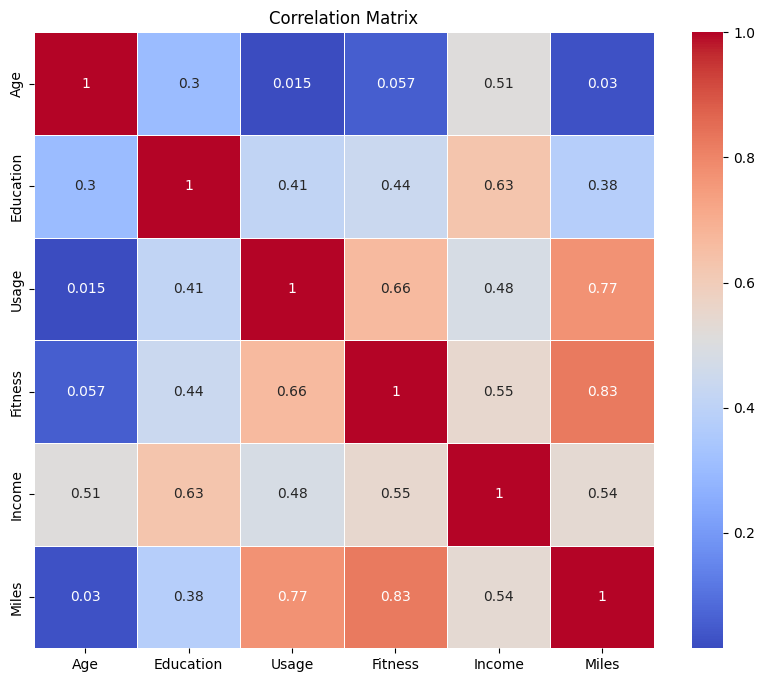

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Creating individual customer profiles for each product, specifying the age, gender, and income group associated with the KP281 product.

In [ ]:
# Filter the dataset for customers who purchased the KP281 product
kp281_customers = data[data['Product'] == 'KP281']

# Customer profiling for KP281 product
age_profile = kp281_customers['Age'].describe()
gender_profile = kp281_customers['Gender'].value_counts(normalize=True)
income_profile = kp281_customers['Income'].describe()

print("Customer Profiling for KP281 Product:")
print("Age Profile:")
print(age_profile)
print("\nGender Profile:")
print(gender_profile)
print("\nIncome Profile:")
print(income_profile)

Customer Profiling for KP281 Product:
Age Profile:
count    80.000000
mean     28.427500
std       6.678313
min      20.000000
25%      23.000000
50%      26.000000
75%      33.000000
max      43.050000
Name: Age, dtype: float64

Gender Profile:
Male      0.5
Female    0.5
Name: Gender, dtype: float64

Income Profile:
count       80.000000
mean     46584.311250
std       8813.246103
min      34053.150000
25%      38658.000000
50%      46617.000000
75%      53439.000000
max      68220.000000
Name: Income, dtype: float64


**RECOMMENDATIONS:**

Based on the analysis conducted on the dataset, Here's a detailed recommendation:

**Product Differentiation:** The analysis indicates that different products (KP281, KP481, KP781) attract different customer demographics. It's essential to tailor marketing messages and product features to match the preferences and needs of each target demographic.

**Customer Profiling:**

KP281 Product: The typical customer profile for the KP281 product includes individuals across various age groups, with a slight inclination towards younger customers. Gender distribution shows a relatively balanced mix, suggesting the product's appeal across genders. Income levels among KP281 customers vary, indicating that the product caters to a diverse socio-economic background.

**Targeted Marketing Campaigns:**

Utilize targeted marketing campaigns that resonate with the identified customer profiles for each product. For instance, for the KP281 product, focus on messaging that emphasizes versatility, innovation, and affordability to appeal to a broad customer base spanning different age groups and income levels.

**Product Development:**

Use the insights from customer profiling to inform product development efforts. For example, consider introducing product variants or features that specifically cater to the preferences of different age groups or income segments within the KP281 customer base.

**Personalized Recommendations:**

Leverage customer data to provide personalized product recommendations to existing and potential customers. Implement recommendation systems based on demographic factors such as age, gender, and income to suggest products that align with individual preferences and purchasing behavior.

**Customer Engagement Strategies:**

Develop customer engagement strategies that foster loyalty and repeat purchases. Offer exclusive promotions, loyalty programs, or rewards tailored to the identified customer segments for each product to incentivize continued engagement and foster brand loyalty.

**Continuous Monitoring and Adaptation:**

Continuously monitor market trends, customer feedback, and sales data to adapt marketing strategies and product offerings accordingly. Conduct periodic analysis to reassess customer profiles and ensure alignment with evolving consumer preferences and market dynamics.

**Data-Driven Decision Making:**

Leverage data-driven insights and analytics to inform strategic decision-making across all aspects of the business. Invest in advanced analytics tools and capabilities to extract actionable insights from customer data, enabling informed decision-making and optimizing resource allocation for maximum impact.

**INSIGHTS:**

Based on the analysis conducted on the dataset, several key insights have been uncovered:

**Demographic Diversity:**

The dataset includes customers from diverse demographic backgrounds, including different age groups, genders, education levels, and marital statuses. This diversity highlights the importance of understanding and catering to the varied needs and preferences of customers across different segments.

**Product Preferences:**

Each product (KP281, KP481, KP781) attracts a distinct customer demographic. For example, the KP281 product appeals to a broad demographic spanning different age groups, genders, and income levels, while other products may have more specific target demographics.

**Purchasing Behavior:**

Customer purchasing behavior varies based on factors such as age, gender, education, marital status, income, and usage patterns. Analyzing these factors provides valuable insights into customer preferences, enabling targeted marketing and product development strategies.

**Correlation Analysis:**

Correlation analysis reveals relationships between different features in the dataset. For example, there may be correlations between age and income, usage and fitness levels, or income and education levels. Understanding these correlations can inform marketing strategies and product offerings.

**Outlier Detection:**

Outlier detection helps identify unusual data points that may indicate anomalies or errors in the dataset. Removing or clipping outliers can improve the accuracy of analysis and modeling by reducing the influence of extreme values.

**Probability Analysis:**

Marginal probability analysis provides insights into the overall likelihood of purchasing each product, while conditional probability analysis reveals the likelihood of purchasing a product given certain conditions, such as gender or marital status. These probabilities can guide targeted marketing efforts.